In [83]:

import utils.common
import evaluation
import importlib
import numpy as np
import time
from models.ConstraintAutoRec import ConstraintAutoRec 
importlib.reload(utils.common)
importlib.reload(evaluation)


<module 'evaluation' from '/mnt/e/owncloud/FH/MasterThesis/Code/evaluation.py'>

In [ ]:
model = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=30, novelty_weight=0.25, diversity_weight=0)
model.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])


In [ ]:
diversity_model = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=30, novelty_weight=0.25, diversity_weight=2.0)
diversity_model.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])


In [73]:
def create_model(novelty_weight):
    m = ConstraintAutoRec(utils.common.movie_lens['dimensions'], epochs=5, novelty_weight=novelty_weight, diversity_weight=0)
    m.train(utils.common.load_dataset(utils.common.movie_lens, 'train'), utils.common.movie_lens['train']['records'])
    return m

models = [create_model(x) for x in [0.1, 0.5, 1.0, 2.0]]

Epoch 1/5
3462/3462 [==============================] - 61s 18ms/step - loss: 0.0296 - accuracy: 0.1109
Epoch 2/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0176 - accuracy: 0.1039
Epoch 3/5
3462/3462 [==============================] - 45s 13ms/step - loss: 0.0150 - accuracy: 0.1161
Epoch 4/5
3462/3462 [==============================] - 45s 13ms/step - loss: 0.0138 - accuracy: 0.1660
Epoch 5/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0130 - accuracy: 0.1881
Epoch 1/5
3462/3462 [==============================] - 57s 16ms/step - loss: 0.0684 - accuracy: 0.0457
Epoch 2/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0438 - accuracy: 0.0659
Epoch 3/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0387 - accuracy: 0.0913
Epoch 4/5
3462/3462 [==============================] - 44s 13ms/step - loss: 0.0360 - accuracy: 0.1163
Epoch 5/5
3462/3462 [==============================] - 44s 13ms/step - lo

In [50]:
import matplotlib.pyplot as plt
models

In [82]:
ev = evaluation.Evaluation(utils.common.movie_lens)
big_eval = ev.evaluate_models(models)
eval_data.head()

Process batch 0
Process batch 1
Process batch 2
Process batch 3
Process batch 4
Process batch 5
Process batch 6
Process batch 7
Process batch 8
Process batch 9
Process batch 0
Process batch 1
Process batch 2
Process batch 3
Process batch 4
Process batch 5
Process batch 6
Process batch 7
Process batch 8
Process batch 9
Process batch 0
Process batch 1
Process batch 2
Process batch 3
Process batch 4
Process batch 5
Process batch 6
Process batch 7
Process batch 8
Process batch 9
Process batch 0
Process batch 1
Process batch 2
Process batch 3
Process batch 4
Process batch 5
Process batch 6
Process batch 7
Process batch 8
Process batch 9


,accuracy,diversity@10,diversity@5,diversity_weight,epc@10,epc@5,epd@5,epochs,mse,name,novelty_weight,precision,recall
0,0.933703,0.318061,0.156319,0,0.729094,0.709974,0.170807,20,0.188898,ConstraintAutoRec,0.1,1.0,0.933703
1,0.891598,0.296547,0.147810,0,0.815188,0.810332,0.169179,20,0.237496,ConstraintAutoRec,0.5,1.0,0.891598
2,0.859730,0.269714,0.129205,0,0.752825,0.742493,0.164829,20,0.265736,ConstraintAutoRec,1.0,1.0,0.859730
3,0.822217,0.266285,0.118318,0,0.763332,0.748306,0.161816,20,0.309332,ConstraintAutoRec,2.0,1.0,0.822217


In [75]:
big_eval

,accuracy,diversity@10,diversity@5,diversity_weight,epc@10,epc@5,epd@5,epochs,mse,name,novelty_weight,precision,recall
0,0.993433,0.309370,0.000677,0,0.809861,0.797123,0.000770,5,0.146175,ConstraintAutoRec,0.1,1.0,0.993433
1,0.980580,0.301300,0.000701,0,0.828527,0.820255,0.000764,5,0.194251,ConstraintAutoRec,0.5,1.0,0.980580
2,0.970214,0.293833,0.000676,0,0.832992,0.827355,0.000760,5,0.220695,ConstraintAutoRec,1.0,1.0,0.970214
3,0.953900,0.288207,0.000624,0,0.850782,0.846885,0.000748,5,0.253001,ConstraintAutoRec,2.0,1.0,0.953900


<BarContainer object of 4 artists>

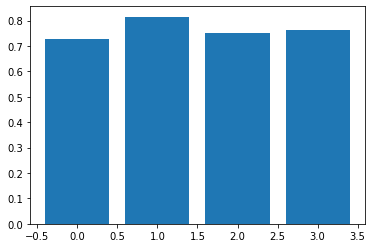

In [55]:
plt.bar(eval_data.index, eval_data['epc@10'])

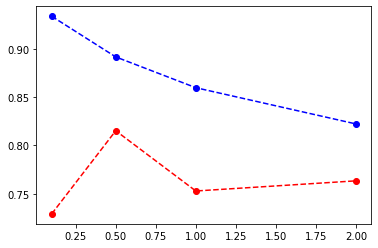

In [71]:
plt.plot(eval_data['novelty_weight'], eval_data['epc@10'], 'ro', ls='--')
plt.plot(eval_data['novelty_weight'], eval_data['accuracy'], 'bo', ls='--')
plt.show()

In [58]:
def plot_bar(data, axis, x_param):
    bottom = data[axis].min() 
    top = data[axis].max()
    margin = (top - bottom) * 0.05
    fig, ax = plt.subplots()
    ax.bar(data.index, data[axis] )
    ax.set_xticks(data.index)
    ax.set_xticklabels(data[x_param])
    ax.set_ylabel(axis)
    ax.set_xlabel(x_param)
    plt.show()

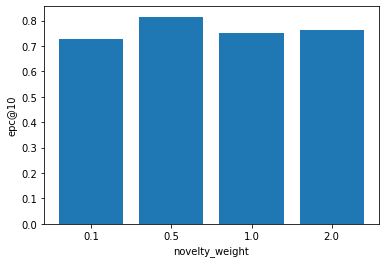

In [59]:
plot_bar(eval_data, 'epc@10', 'novelty_weight')

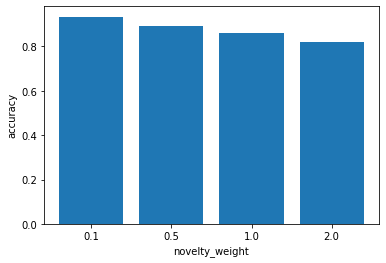

In [60]:
plot_bar(eval_data, 'accuracy', 'novelty_weight')